In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Ahmad\projects\Zomato EDA\Zomato data .csv")
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.info

<bound method DataFrame.info of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet 

In [4]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [5]:
df["rate"] = df["rate"].str.replace("/5","").astype(float)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
# check if there is any null values
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [8]:
# if there was null values 
df["rate"].fillna(df["rate"].mean())

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='listed_in(type)', ylabel='count'>

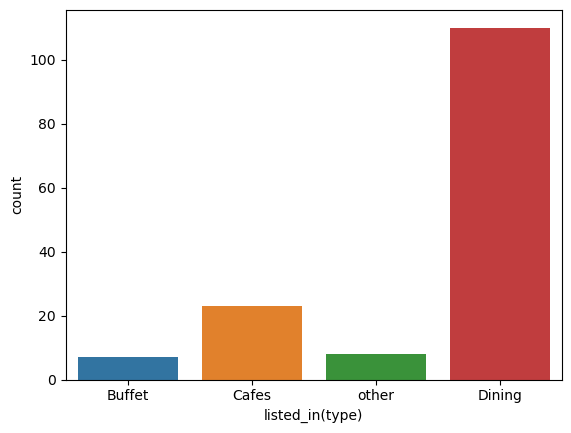

In [10]:
sns.countplot(x="listed_in(type)",data = df)

In [11]:
order = df["listed_in(type)"].value_counts().index

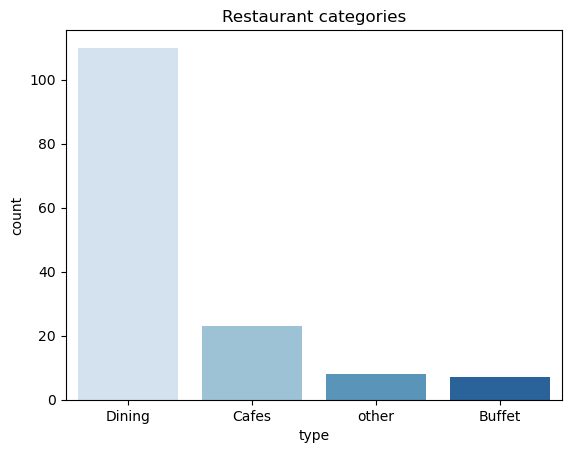

In [12]:
# improved plot
sns.countplot(data = df,x="listed_in(type)",order = order,palette = "Blues")
plt.title("Restaurant categories")
plt.xlabel("type")
plt.show()

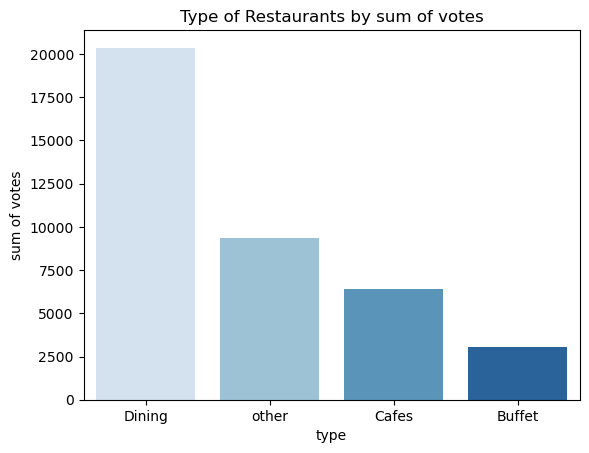

In [13]:
votes_sum = df.groupby("listed_in(type)")["votes"].sum().sort_values(ascending = False)
sns.barplot(x=votes_sum.index,y=votes_sum.values,palette = "Blues")
plt.title("Type of Restaurants by sum of votes")
plt.xlabel("type")
plt.ylabel("sum of votes")
plt.show()

In [14]:
# what restaurant had the highest votes
df.sort_values(by = "votes",ascending = False).iloc[0]["name"]

'Empire Restaurant'

In [15]:
# another way
df.loc[df["votes"]==df["votes"].max() ]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
38,Empire Restaurant,Yes,No,4.4,4884,750,other


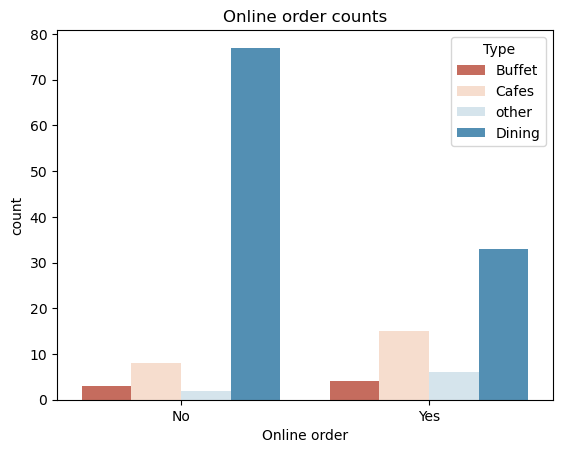

In [16]:
# online orders
on_order = df["online_order"].value_counts().index
sns.countplot(data  = df,x="online_order",order = on_order,palette ="RdBu",hue = "listed_in(type)")
plt.title("Online order counts")
plt.xlabel("Online order")
plt.legend(title = "Type")
plt.show()

In [17]:
# all restaurants with higher than average rating and votes more than 500 ordered by rate then vote and rate desc and vote asc

avg_rate = df["rate"].mean()

df[(df["rate"]>= avg_rate) & (df["votes"]>= 500)].sort_values(by = ["rate","votes"],ascending = [False,True])

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
44,Onesta,Yes,Yes,4.6,2556,600,other
86,Meghana Foods,Yes,No,4.4,4401,600,Dining
38,Empire Restaurant,Yes,No,4.4,4884,750,other
9,Smacznego,Yes,No,4.2,504,550,Cafes
37,Szechuan Dragon,Yes,No,4.2,1647,600,Dining
71,The Biryani Cafe,No,No,4.1,520,300,Dining
76,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,150,Dining
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


In [18]:
# drop similar input
df.drop(index = 44,inplace = True)


In [19]:

df[(df["name"] == "San Churro Cafe") | (df["name"] == "CAFE NOVA")]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
14,San Churro Cafe,Yes,No,3.8,918,800,Cafes
25,CAFE NOVA,No,No,3.2,11,600,Cafes
104,CAFE NOVA,No,No,3.2,11,600,Dining


In [20]:
 index_to_drop = df[(df["name"] == "San Churro Cafe") & (df["listed_in(type)"] == "Buffet")].index
df.drop(index = index_to_drop,inplace = True)

In [21]:
index_to_drop_2 = df[(df["name"] == "CAFE NOVA") & (df["listed_in(type)"] == "Dining")].index
df.drop(index = index_to_drop_2, inplace = True)


In [22]:
df["name"].value_counts()

Jalsa                         1
Om Sri Vinayaka Chats         1
Vi Ra's Bar and Restaurant    1
Kaggis                        1
Ayda Persian Kitchen          1
                             ..
Shree Cool Point              1
Corner House Ice Cream        1
Biryanis And More             1
Roving Feast                  1
Vijayalakshmi                 1
Name: name, Length: 145, dtype: int64

In [23]:
df["name"].value_counts()

Jalsa                         1
Om Sri Vinayaka Chats         1
Vi Ra's Bar and Restaurant    1
Kaggis                        1
Ayda Persian Kitchen          1
                             ..
Shree Cool Point              1
Corner House Ice Cream        1
Biryanis And More             1
Roving Feast                  1
Vijayalakshmi                 1
Name: name, Length: 145, dtype: int64

In [24]:

df[(df["name"] == "San Churro Cafe") | (df["name"] == "CAFE NOVA")]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
14,San Churro Cafe,Yes,No,3.8,918,800,Cafes
25,CAFE NOVA,No,No,3.2,11,600,Cafes


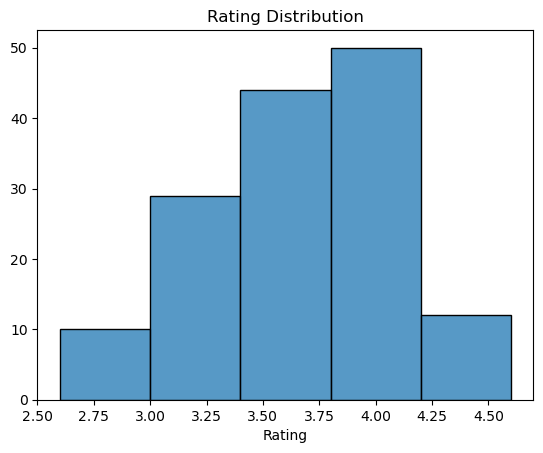

In [25]:
#exploring rate frequencies
sns.histplot(data = df,x="rate",bins = 5)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("")
plt.show()

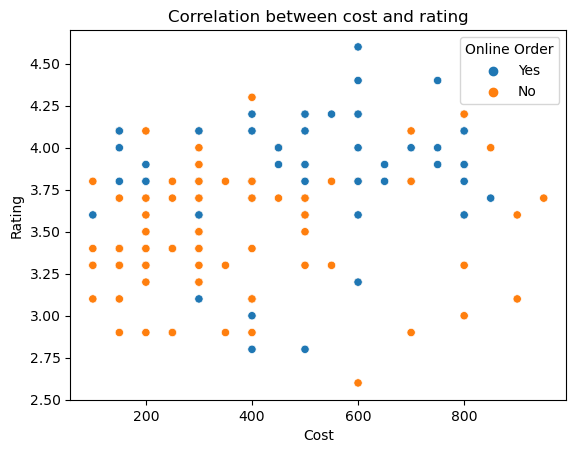

In [37]:
sns.scatterplot(data = df,x = "approx_cost(for two people)",y="rate",hue = "online_order")
plt.title("Correlation between cost and rating")
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.legend(title = "Online Order")
plt.show()

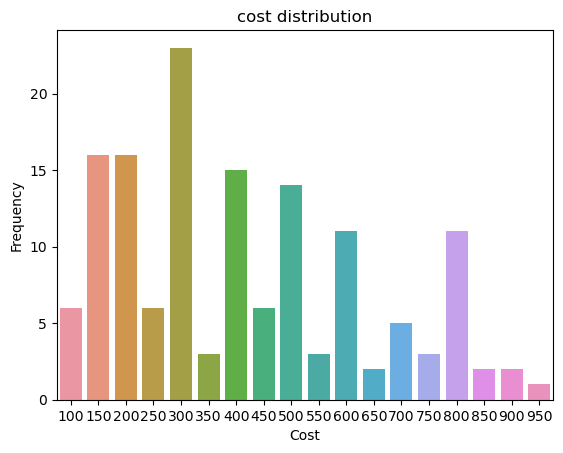

In [30]:
#cost distribution
sns.countplot(data =df, x="approx_cost(for two people)")
plt.title("cost distribution")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

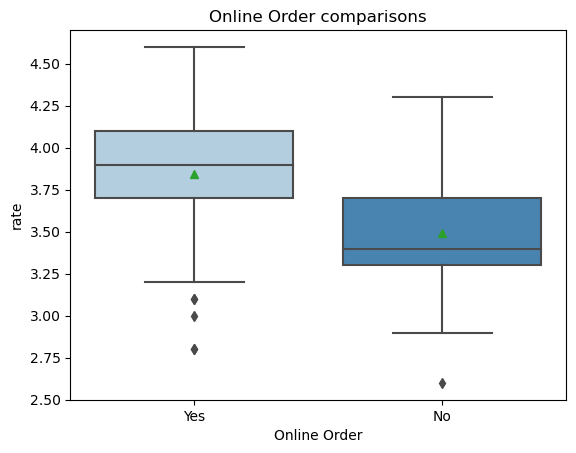

In [46]:
sns.boxplot(data = df, x= "online_order",y = "rate",palette = "Blues",showmeans = True)
plt.title("Online Order comparisons")
plt.xlabel("Online Order")
plt.show()

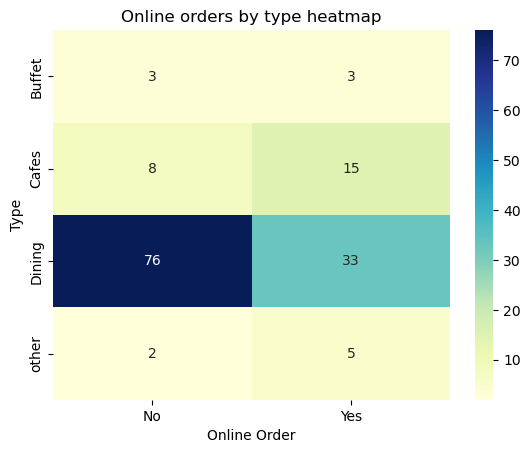

In [76]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Online orders by type heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type")
plt.show()

